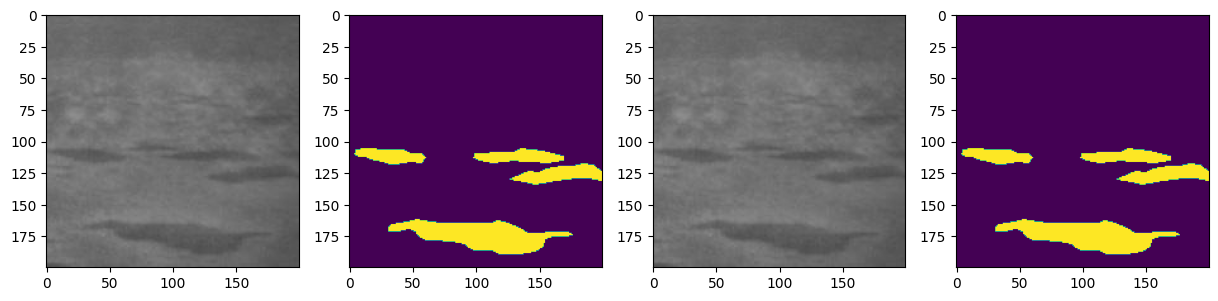

In [67]:
import random
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image

class Enhance:
    def __init__(self, brightness=1, contrast=1, noise=None, crop=None, thre=0.5):
        self.brightness = brightness
        self.contrast = contrast
        self.noise = noise
        self.crop = crop
        self.thre = thre

        other_trans = [
            transforms.ColorJitter(brightness=self.brightness, contrast=self.contrast),
        ]
        # if self.noise != None:
        #     other_trans.append(transforms.GaussianNoise(var_limit=(10.0, 50.0), p=0.2))
        self.transform = transforms.Compose(other_trans)
        #self.crop = transforms.Compose([transforms.TenCrop(100)])

    def __call__(self, img, mask):
        # 亮度和对比度调整
        if random.uniform(0, 1) < self.thre:
            img = self.transform(img)
        # if random.uniform(0, 1) < 1:#self.thre:
        #     img = self.crop(img)[0]
        #     mask =  self.crop(mask)[0]
        return img, mask
import numpy as np

import matplotlib.pyplot as plt
trainmeta = pd.read_csv("stats/train-meta.csv", dtype=object)
imid = random.choice(trainmeta['id'])
myim = Image.open('data/images/training/' + imid + '.jpg')
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
mask = Image.open('data/annotations/training/' + imid + '.png')
axes[0].imshow(myim)
axes[1].imshow(mask)

enh = Enhance(brightness=0.6, contrast=0.8, noise=True, crop=True, thre=0.2)
myim, mask = enh(myim, mask)
axes[2].imshow(myim)
axes[3].imshow(mask)
plt.show()